# 카메라 스티커앱 만들기


## 목차
- 1. 이미지 준비
- 2. Face Detection
- 3. 스티커 적용
- 4. 결론

In [1]:
# 필요한 모듈 불러오기
import os
import dlib

import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. 이미지 준비
- 오랜 시간 들여다봐야 하는 만큼 인물 이미지는 예쁜 연예인 사진을 준비했다.
- 스티커 사진은 주어진 [수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)를 사용했다.
- 반복되는 기능을 함수(img_resize())로 정의하여 사용했다.

In [2]:
# 사용할 이미지들이 저장되어 있는 디렉터리
base_path = os.getenv('HOME') + '/aiffel/aiffel_projects/data/camera_sticker/images'

# 각 이미지 파일 경로들을 리스트에 담는다
img_path_list = []

for i in range(7):  # 총 7개의 이미지 사용
    i += 1
    filename = str(i) + '.png'
    path = os.path.join(base_path, filename)
    img_path_list.append(path)
    
print(img_path_list)

['/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/1.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/2.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/3.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/4.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/5.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/6.png', '/aiffel/aiffel/aiffel_projects/data/camera_sticker/images/7.png']


In [3]:
# OpenCV로 이미지를 읽어와서 크기 변경하고, RGB 형태로 변환해주는 함수
def img_resize(img_path):
    img_bgr = cv2.imread(img_path)
    img_bgr = cv2.resize(img_bgr, (480, 640))
    
    img_show = img_bgr.copy()   # 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # RGB로 형태 바꿔줌
    
    return img_bgr, img_show, img_rgb


# img_size() 함수로 전처리한 이미지들을 하나의 리스트에 담는다
img_list = []
img_list.append(img_resize(img_path_list[0]))
img_list.append(img_resize(img_path_list[1]))
img_list.append(img_resize(img_path_list[5]))
img_list.append(img_resize(img_path_list[6]))

print(len(img_list))

4


**중간 과정에서 아래 이미지 3개는 face detection이 제대로 이루어지지 않아 사용하지 않았다.**

**face detection에 실패한 이유는 다음과 같이 가설을 세워 보았다.**

- 1) 얼굴이 지나치게(90도에 가깝게) 회전되어 있다.
- 2) 얼굴의 일부가 머리카락이나 손에 가려져 있다.
- 3) 얼굴의 한쪽 면이 많은 부분 가려져 있는 옆면 사진이다.

**아쉽지만 위 가설에 대한 정확한 검증은 나중을 기약하기로 했다.**

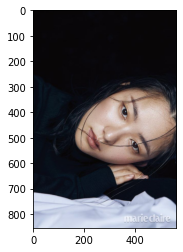

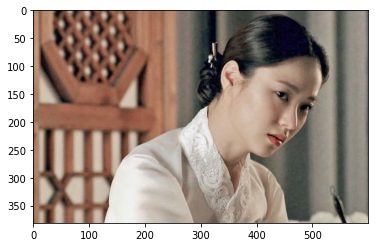

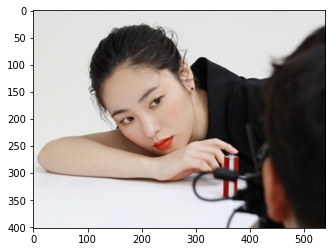

In [28]:
failed_list = img_path_list[2:5]
for failed in failed_list:
    plt.imshow(cv2.cvtColor(cv2.imread(failed), cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
# 각 이미지를 사용할 변수들에 unpacking
first_img_bgr, first_img_show, first_img_rgb = img_list[0]
second_img_bgr, second_img_show, second_img_rgb = img_list[1]
third_img_bgr, third_img_show, third_img_rgb = img_list[2]
fourth_img_bgr, fourth_img_show, fourth_img_rgb = img_list[3]

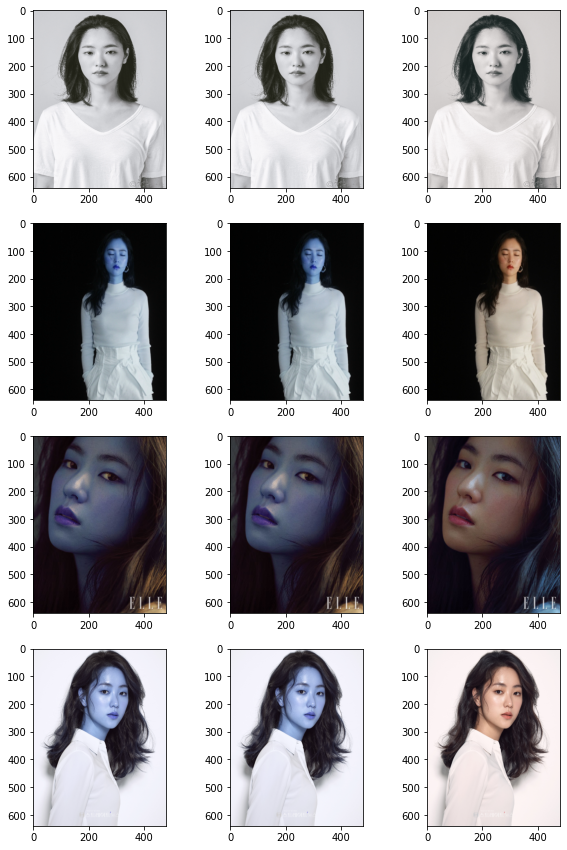

In [5]:
# 전처리한 이미지들을 한 번에 출력해서 확인
fig = plt.figure(figsize=(10, 15))

rows = 4
cols = 3
i = 0

for imgs in img_list:
    for img in imgs:
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img)
        i += 1

plt.show()

## 2. Face Detection
- 1) dlib의 get_frontal_face_detector()를 이용해 얼굴을 감지한다.
- 2) 얼굴의 bounding box를 이미지에 표시한다.
- 3) 얼굴의 landmark를 표시한다.

위 과정을 반복하기 쉽도록 함수로 정의하여 사용하였다.

In [6]:
# dlib을 활용해서 hog detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [7]:
# 얼굴의 bounding box를 추출하고 이미지에 표시하는 함수
def draw_rect(img_show):
    dlib_rects = detector_hog(img_show, 1)
    
    for rect in dlib_rects:
        l = rect.left()
        t = rect.top()
        r = rect.right()
        b = rect.bottom()
        
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)
        
        plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
        plt.show()
    
    return img_show, dlib_rects

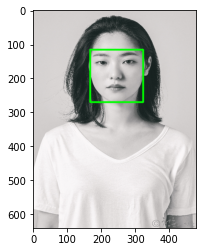

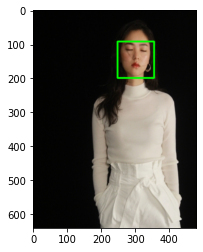

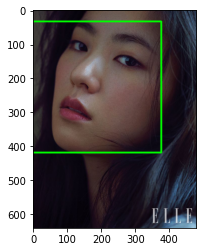

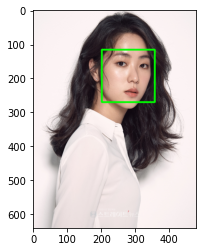

In [8]:
# 3개의 이미지에서 얼굴을 찾아 bounding box를 표시한다.
first_img_show, first_rects = draw_rect(first_img_show)
second_img_show, second_rects = draw_rect(second_img_show)
third_img_show, third_rects = draw_rect(third_img_show)
fourth_img_show, fourth_rects = draw_rect(fourth_img_show)

In [9]:
# 얼굴에 landmark 표시하기 위해 dlib의 shape_predictor를 이용
model_path = os.getenv('HOME') + '/aiffel/aiffel_projects/data/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
# bounding box 내부에서 landmark를 찾아 표시하는 함수
def draw_landmarks(img_show, dlib_rects):
    list_landmarks = []
    
    for rect in dlib_rects:
        points = landmark_predictor(img_show, rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(landmark):
            cv2.circle(img_show, point, 3, (0, 255, 255), -1)
            
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return img_show, list_landmarks

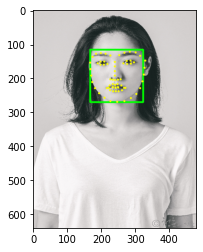

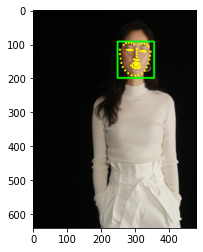

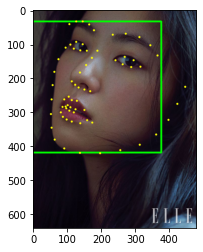

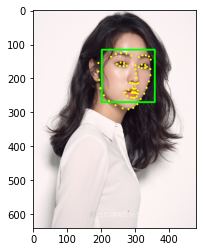

In [11]:
# 이미지 4개에 landmark를 표시한다
first_img_show, first_landmarks = draw_landmarks(first_img_show, first_rects)
second_img_show, second_landmarks = draw_landmarks(second_img_show, second_rects)
third_img_show, third_landmarks = draw_landmarks(third_img_show, third_rects)
fourth_img_show, fourth_landmarks = draw_landmarks(fourth_img_show, fourth_rects)

## 3. 스티커 적용
- 1) 스티커 이미지(고양이 수염)를 불러온다.
- 2) 배경 이미지에 맞게 스티커를 resize 한다.
- 3) 이미지에 스티커를 붙여준다.
    - put_sticker 함수는 그냥 기본 스티커를 붙여준다.
    - weighted_sticker 함수는 투명도를 적용한 스티커를 붙여준다.

In [12]:
# 스티커 이미지(수염)를 불러온다
sticker_path = os.getenv('HOME') + '/aiffel/aiffel_projects/data/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

print(f'sticker size: {img_sticker.shape}')

sticker size: (512, 512, 3)


In [13]:
# 스티커를 이미지에 맞게 resize하는 함수
def trim_sticker(dlib_rects, landmarks):
    # 이미지의 bounding box 크기(w, h), 얼굴의 주요 좌표(x, y) 확인
    for rect, landmark in zip(dlib_rects, landmarks):
        x = landmark[30][0]           # nose index = 30
        y = landmark[30][1]
        w = rect.width()
        h = rect.height()
    print(f'(x, y): {x}, {y}')
    print(f'(w, h): {w}, {h}')
    
    # bounding box에 맞춰 스티커 사이즈 resize
    resized_sticker = cv2.resize(img_sticker, (w,h))
    print(f'resized sticker: {resized_sticker.shape}')
    
    # 사용할 부분만 남기고 스티커 자르기
    y_start = int(h//3)
    y_end = y_start + h//3
    resized_sticker = resized_sticker[y_start:y_end]
    print(f'resized sticker: {resized_sticker.shape}')
    plt.imshow(resized_sticker)
    plt.show()
    
    return x, y, w, h, resized_sticker

In [14]:
# 이미지에 스티커를 붙여주는 함수
def put_sticker(img, dlib_rects, landmarks):
    # trim_sticker() 함수를 호출해 스티커를 배경 이미지에 맞게 전처리한다
    x, y, w, h, trimmed_sticker = trim_sticker(dlib_rects, landmarks)
        
    # 스티커를 붙일 좌표(refined_x, refined_y) 구하기
    refined_x = x - w//2      # left
    refined_y = y - h//10     # top
    print(f'(refined_x, refined_y): {refined_x}, {refined_y}')
    
    if refined_x < 0:
        trimmed_sticker = trimmed_sticker[:, -refined_x:]
        refined_x = 0
        
        print(f'trimmed sticker: {trimmed_sticker.shape}')
        plt.imshow(trimmed_sticker)
        plt.show()
    
    # 스티커 붙일 범위 지정
    sticker_area = img[refined_y:refined_y+trimmed_sticker.shape[0], refined_x:refined_x+trimmed_sticker.shape[1]]

    # 스티커 붙이기
    img[refined_y:refined_y+trimmed_sticker.shape[0], refined_x:refined_x+trimmed_sticker.shape[1]] = \
        np.where(trimmed_sticker==0, trimmed_sticker, sticker_area).astype(np.uint8)

    # 스티커 붙인 이미지 반환
    return img

In [15]:
# 이미지에 투명도를 적용한 스티커를 붙여주는 함수
def weighted_sticker(img, dlib_rects, landmarks):
    # trim_sticker() 함수를 호출해 스티커를 배경 이미지에 맞게 전처리한다
    x, y, w, h, trimmed_sticker = trim_sticker(dlib_rects, landmarks)
        
    # 스티커를 붙일 좌표(refined_x, refined_y) 구하기
    refined_x = x - w//2      # left
    refined_y = y - h//10     # top
    print(f'(refined_x, refined_y): {refined_x}, {refined_y}')
    
    if refined_x < 0:
        trimmed_sticker = trimmed_sticker[:, -refined_x:]
        refined_x = 0
        
        print(f'trimmed sticker: {trimmed_sticker.shape}')
        plt.imshow(trimmed_sticker)
        plt.show()
    
    # 스티커 붙일 범위 지정
    sticker_area = img[refined_y:refined_y+trimmed_sticker.shape[0], refined_x:refined_x+trimmed_sticker.shape[1]]
    
    light_sticker = cv2.addWeighted(sticker_area, 0.3, trimmed_sticker, 0, 0)
    
    # 스티커 붙이기
    img[refined_y:refined_y+trimmed_sticker.shape[0], refined_x:refined_x+trimmed_sticker.shape[1]] = \
        np.where(trimmed_sticker==0, light_sticker, sticker_area).astype(np.uint8)

    # 스티커 붙인 이미지 반환
    return img

## 이제 한 장씩 여유롭게 감상한다.

(x, y): 239, 192
(w, h): 156, 155
resized sticker: (155, 156, 3)
resized sticker: (51, 156, 3)


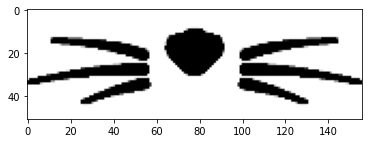

(refined_x, refined_y): 161, 177


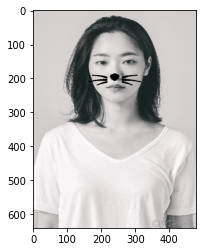

In [19]:
# 첫 번째 이미지에 기본 스티커 적용
img = put_sticker(first_img_bgr, first_rects, first_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 239, 192
(w, h): 156, 155
resized sticker: (155, 156, 3)
resized sticker: (51, 156, 3)


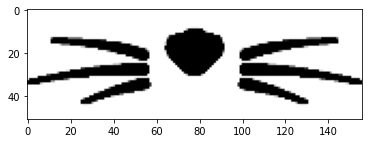

(refined_x, refined_y): 161, 177


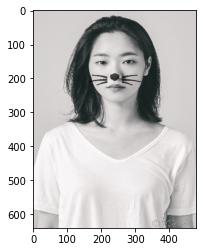

In [18]:
# 첫 번째 이미지에 투명 스티커 적용
img = weighted_sticker(first_img_bgr, first_rects, first_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 303, 137
(w, h): 108, 108
resized sticker: (108, 108, 3)
resized sticker: (36, 108, 3)


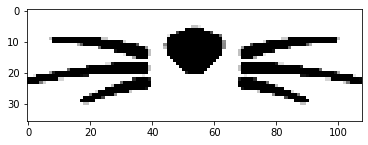

(refined_x, refined_y): 249, 127


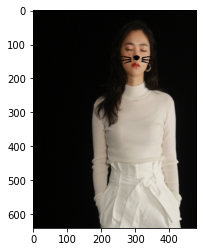

In [21]:
# 두 번째 이미지에 기본 스티커 적용
img = put_sticker(second_img_bgr, second_rects, second_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 303, 137
(w, h): 108, 108
resized sticker: (108, 108, 3)
resized sticker: (36, 108, 3)


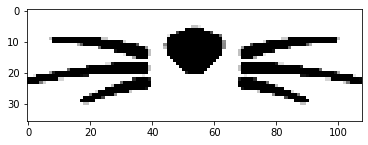

(refined_x, refined_y): 249, 127


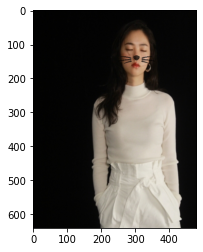

In [20]:
# 두 번째 이미지에 투명 스티커 적용
img = weighted_sticker(second_img_bgr, second_rects, second_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 137, 183
(w, h): 429, 386
resized sticker: (386, 429, 3)
resized sticker: (128, 429, 3)


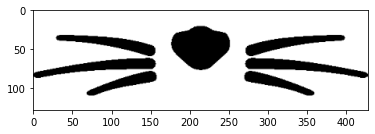

(refined_x, refined_y): -77, 145
trimmed sticker: (128, 352, 3)


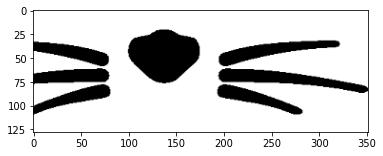

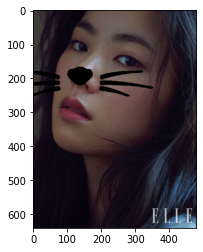

In [23]:
# 세 번째 이미지에 기본 스티커 적용
img = put_sticker(third_img_bgr, third_rects, third_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 137, 183
(w, h): 429, 386
resized sticker: (386, 429, 3)
resized sticker: (128, 429, 3)


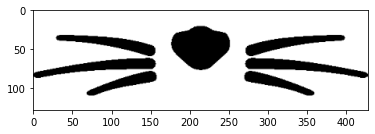

(refined_x, refined_y): -77, 145
trimmed sticker: (128, 352, 3)


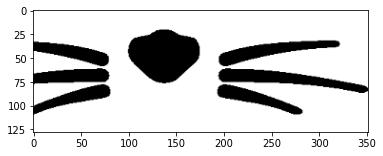

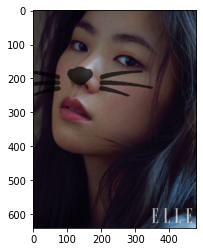

In [22]:
# 세 번째 이미지에 투명 스티커 적용
img = weighted_sticker(third_img_bgr, third_rects, third_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 303, 199
(w, h): 156, 155
resized sticker: (155, 156, 3)
resized sticker: (51, 156, 3)


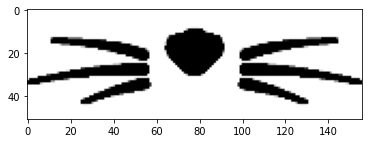

(refined_x, refined_y): 225, 184


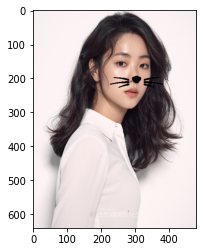

In [17]:
# 네 번째 이미지에 기본 스티커 적용
img = put_sticker(fourth_img_bgr, fourth_rects, fourth_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(x, y): 303, 199
(w, h): 156, 155
resized sticker: (155, 156, 3)
resized sticker: (51, 156, 3)


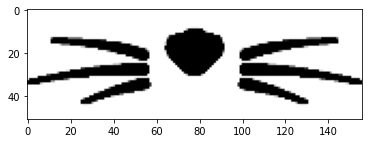

(refined_x, refined_y): 225, 184


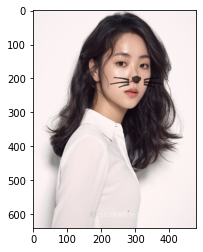

In [16]:
# 네 번째 이미지에 투명 스티커 적용
img = weighted_sticker(fourth_img_bgr, fourth_rects, fourth_landmarks)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 4. 결론
- 1) 얼굴의 크기나 촬영 거리에 따른 detection 성능에는 차이가 없었다. 모두 잘 감지되었다.
- 2) 어느 축을 기준으로 하던 얼굴의 각도가 지나치게 회전되어 있을 경우(얼굴이 누워 있거나, 옆면 위주인 경우)에는 face detection이 잘 되지 않았다. 정확히 어떤 이유 때문에 detection이 되지 않았는지 추후 더 테스트 해봐야겠다.
- 3) shape_predictor는 눈을 감고 있는 것까지 detect할 정도로 성능이 좋았다.
- 4) 상대적인 비율을 이용해 스티커의 위치를 적용하니, 어떤 이미지에 적용해도 모두 알맞은 위치에 붙일 수 있었다.
- 5) 아쉽게도 얼굴의 각도에 맞춰 스티커까지 transform하는 것은 적용하지 못했다. 이것도 추후 더 시도해봐야겠다.